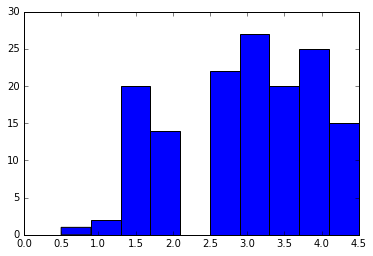

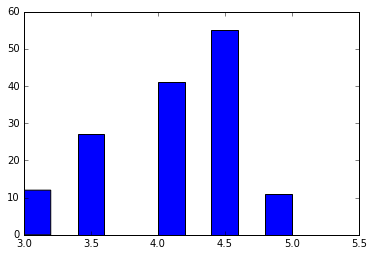

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
movies = pd.read_csv('fandango_score_comparison.csv')
plt.hist(movies['Metacritic_norm_round'])
plt.show()
plt.hist(movies['Fandango_Stars'])
plt.show()

In [3]:
# Notably Metacritic's peak is nearly 1:1 between 3 and 4 stars,
# whereas Fandango has a 1:4 ratio between 3 and 4 stars.
# It would appear there is an obvious upward skew in Fandango ratings. 

In [4]:
import numpy 
f_mean = movies['Fandango_Stars'].mean()
m_mean = movies['Metacritic_norm_round'].mean()
print(f_mean)
print (m_mean)
f_median = movies['Fandango_Stars'].median()
m_median = movies['Metacritic_norm_round'].median()
print(f_median)
print(m_median)
f_std = numpy.std(movies['Fandango_Stars'])
m_std = numpy.std(movies['Metacritic_norm_round'])
print(f_std)
print(m_std)

4.08904109589
2.97260273973
4.0
3.0
0.53853216127
0.987561029704


In [5]:
# Metacritic mean: 2.9, median: 3 | Fandango mean: 4.1, median 4
# This shows numeric proof Fandango is skewed 20% upward in ratings
# Metacritic std: 1 / Fandango std: 0.53
# This metric shows disproportionate clustering in Fandango ratings
# With its mean and median near 4, 68% are 3.5 - 4.5 stars rating
# In comparison Metacritic's comparable range is 2-4 stars, proportinate

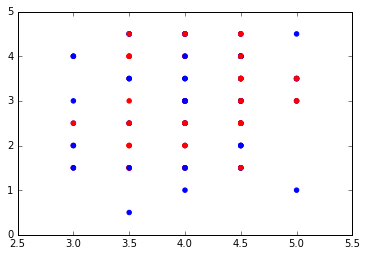

In [6]:
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'], color=['red', 'blue'])
plt.show()

In [7]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']
movies['fm_diff'] = abs(movies['fm_diff'])
sort = movies.sort(columns=['fm_diff'], ascending=False)
print(sort['FILM'].head())

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [8]:
import scipy.stats
from scipy.stats.stats import pearsonr
scipy.stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])

(0.17844919073895918, 0.031161516228523815)

In [9]:
# Respectively, the P values are 18% for Fandango and 3% for Metacritic-
# weak correlations for both. Which means there is not
# a linear relationship between the two value sets

In [10]:
from scipy.stats.stats import linregress
scipy.stats.linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

LinregressResult(slope=0.097311077973928267, intercept=3.7997739188994188, rvalue=0.17844919073895882, pvalue=0.031161516228524384, stderr=0.04471354465679829)

In [11]:
pred_3 = 3 * 0.097311077973928267 + 3.7997739188994188
pred_3

4.091707152821204

3.897084996873347
4.28632930876906


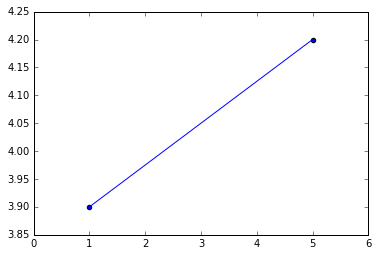

In [12]:
slope = 0.097311077973928267
intercept = 3.7997739188994188
one = 1 * slope + intercept
five = 5 * slope + intercept
print(one)
print(five)
plt.scatter([1.0, 5.0], [3.9, 4.2])
plt.plot([1.0, 5.0], [3.9, 4.2])
plt.xlim(0,6)
plt.show()